# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 손실 곡선

In [1]:
# 모듈 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 패션 MNIST 데이터 다운로드
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

# SGD Classifier 사용을 위한 정규화 + 2차원 배열 -> 1차원 배열 변경
train_scaled = train_input / 255.0

# train 데이터 -> train, val 데이터 분류
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
# 신경망 모델 생성
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_fn()

In [3]:
# 신경망 층 정보 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 손실함수, 측정 지표 설정(Optimizer : RMSprop)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 훈련 + 훈련 측정값 저장
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [5]:
# 확인용 코드 - 훈련 측정값 딕셔너리 key
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


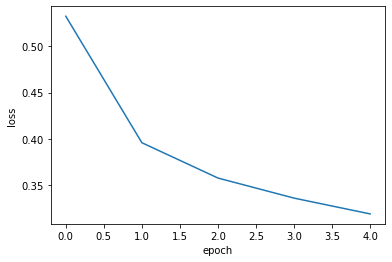

In [6]:
# 훈련 측정값 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

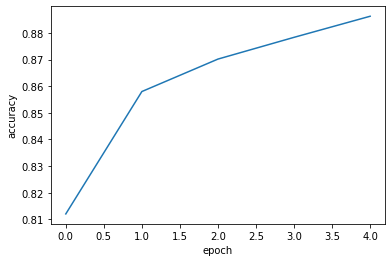

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [8]:
# 신경망 모델 생성
model = model_fn()

# 손실함수, 측정 지표 설정(Optimizer : RMSprop)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 훈련 + 훈련 측정값 저장
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

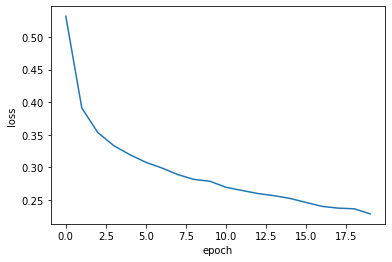

In [9]:
# 훈련 측정값 시각화
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

## 검증 손실

In [10]:
# 신경망 모델 생성
model = model_fn()

# 손실함수, 측정 지표 설정(Optimizer : RMSprop)
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 훈련(검증 데이터 전달) + 훈련 측정값 저장
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [11]:
# 확인용 코드 - 훈련 측정값 딕셔너리 key
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


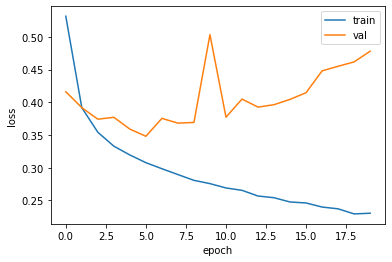

In [12]:
# 훈련 측정값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

In [13]:
# 신경망 모델 생성
model = model_fn()

# 손실함수, 측정 지표 설정(Optimizer : adam)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

# 모델 훈련(검증 데이터 전달) + 훈련 측정값 저장
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

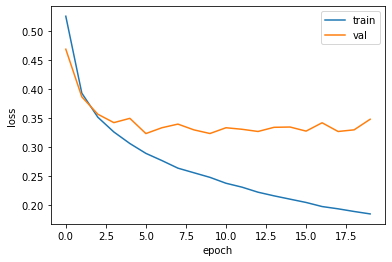

In [14]:
# 훈련 측정값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

## 드롭아웃

In [15]:
# 신경망 모델 생성(모델 과적합 방지 - Dropout층 추가)
model = model_fn(keras.layers.Dropout(0.3))

# 신경망 층 정보 출력
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 손실함수, 측정 지표 설정(Optimizer : adam)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

# 모델 훈련(검증 데이터 전달) + 훈련 측정값 저장
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

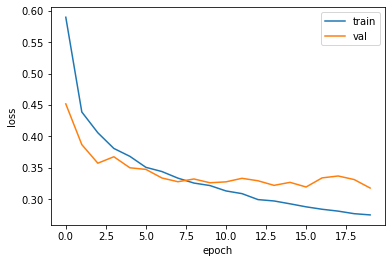

In [17]:
# 훈련 측정값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

## 모델 저장과 복원

In [25]:
# 신경망 모델 생성(모델 과적합 방지 - Dropout층 추가)
model = model_fn(keras.layers.Dropout(0.3))

# 손실함수, 측정 지표 설정(Optimizer : adam)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

# 모델 훈련(검증 데이터 전달) + 훈련 측정값 저장
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, 
                    validation_data=(val_scaled, val_target))

In [26]:
# 훈련된 모델 파라미터 저장
model.save_weights('model-weights.h5')

In [27]:
# 훈련된 모델 구조 + 파라미터 저장
model.save('model-whole.h5')

In [28]:
# 확인용 코드 - 파일 생성 확인
!ls -al *.h5

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [29]:
# 신경망 모델 생성(모델 과적합 방지 - Dropout층 추가)
model = model_fn(keras.layers.Dropout(0.3))

# 훈련된 모델 파라미터 불러오기
model.load_weights('model-weights.h5')

In [30]:
# 예측된 10개 확률 중 가장 큰 인덱스와 타겟 라벨 비교 + 정확도 계산
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.88575


In [32]:
# 훈련된 모델 구조 + 파라미터 불러오기
model = keras.models.load_model('model-whole.h5')

# 손실함수, 측정 지표 설정(Optimizer : adam)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

# 모델 성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 424us/step - loss: 0.3228 - accuracy: 0.8857


[0.3227856755256653, 0.8857499957084656]

## 콜백

In [33]:
# 신경망 모델 생성(모델 과적합 방지 - Dropout층 추가)
model = model_fn(keras.layers.Dropout(0.3))

# 손실함수, 측정 지표 설정(Optimizer : adam)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

# Callback - 에포크마다 모델 저장 + 결론적으로, 가장 낮은 검증 점수 만드는 모델만 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)

# 모델 훈련(검증 데이터 전달 + 콜백 지정) + 훈련 측정값 저장
model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [34]:
# 훈련된 모델 구조 + 파라미터 불러오기
model = keras.models.load_model('best-model.h5')

# 손실함수, 측정 지표 설정(Optimizer : adam)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

# 모델 성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 427us/step - loss: 0.3176 - accuracy: 0.0957


[0.31756243109703064, 0.09574999660253525]

In [35]:
# 신경망 모델 생성(모델 과적합 방지 - Dropout층 추가)
model = model_fn(keras.layers.Dropout(0.3))

# 손실함수, 측정 지표 설정(Optimizer : adam)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

# Callback - 에포크마다 모델 저장 + 결론적으로, 가장 낮은 검증 점수 만드는 모델만 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)

# Callback - 검증 점수 2회 연속 상승 시 조기 종료 + 결론적으로, 가장 낮은 검증 점수 만드는 파라미터만 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# 모델 훈련(검증 데이터 전달 + 콜백 지정) + 훈련 측정값 저장
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [36]:
# 몇 번째 에포크에서 조기 종료되었는지 확인
# (0 에포크 부터 시작됨. patience 하이퍼파라미터를 고려해서 실제 가장 낮은 검증 점수를 가지는 에포크를 계산할 수 있다)
print(early_stopping_cb.stopped_epoch)

4


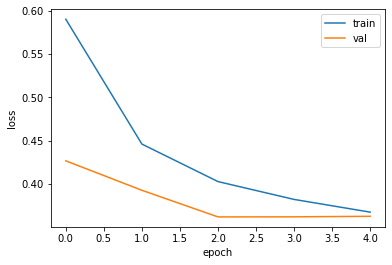

In [37]:
# 훈련 측정값 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

plt.show()

In [38]:
# 모델 성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 435us/step - loss: 0.3617 - accuracy: 0.8668


[0.3617432415485382, 0.8668333292007446]